# Movielens Case Study

### Background of Problem Statement 

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. Members of the GroupLens Research Project are involved in many research projects related to the fields of information filtering, collaborative filtering, and recommender systems. The project is led by professors John Riedl and Joseph Konstan. The project began to explore automated collaborative filtering in 1992 but is most well known for its worldwide trial of an automated collaborative filtering system for Usenet news in 1996. Since then the project has expanded its scope to research overall information by filtering solutions, integrating into content-based methods, as well as, improving current collaborative filtering technology.

### Problem Objective

Here, we ask you to perform the analysis using the Exploratory Data Analysis technique. You need to find features affecting the ratings of any particular movie and build a model to predict the movie ratings.

### Analysis Tasks to be performed:

__Import the three datasets__

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
movies = pd.read_csv("movies.dat",sep="::",names=["MovieID","Title","Genres"])

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [3]:
movies.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
ratings = pd.read_csv("ratings.dat",sep="::",names=["UserID","MovieID","Rating","Timestamp"])

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [5]:
ratings.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [6]:
users = pd.read_csv("users.dat",sep="::",names=["UserID","Gender","Age","Occupation","ZipCode"])

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [7]:
users.head()

,UserID,Gender,Age,Occupation,ZipCode
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


__Create a new dataset [Master_Data] with the following columns MovieID Title UserID Age Gender Occupation Rating. (Hint: (i) Merge two tables at a time. (ii) Merge the tables using two primary keys MovieID & UserId)__

In [8]:
temp = movies.merge(ratings,how="left",on="MovieID")

In [9]:
temp.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1.0,5.0,978824268.0
1,1,Toy Story (1995),Animation|Children's|Comedy,6.0,4.0,978237008.0
2,1,Toy Story (1995),Animation|Children's|Comedy,8.0,4.0,978233496.0
3,1,Toy Story (1995),Animation|Children's|Comedy,9.0,5.0,978225952.0
4,1,Toy Story (1995),Animation|Children's|Comedy,10.0,5.0,978226474.0


In [10]:
Master_Data = temp.merge(users,how="left",on="UserID")

In [11]:
Master_Data = Master_Data[["MovieID","Title","UserID","Age","Gender","Occupation","Rating"]]

In [12]:
Master_Data.head()

,MovieID,Title,UserID,Age,Gender,Occupation,Rating
0,1,Toy Story (1995),1.0,1.0,F,10.0,5.0
1,1,Toy Story (1995),6.0,50.0,F,9.0,4.0
2,1,Toy Story (1995),8.0,25.0,M,12.0,4.0
3,1,Toy Story (1995),9.0,25.0,M,17.0,5.0
4,1,Toy Story (1995),10.0,35.0,F,1.0,5.0


__Explore the datasets using visual representations (graphs or tables), also include your comments on the following:__
- User Age Distribution
- User rating of the movie “Toy Story”
- Top 25 movies by viewership rating
- Find the ratings for all the movies reviewed by for a particular user of user id = 2696

---------------

Let's see how many movies are there in the dataset

In [13]:
Master_Data["MovieID"].nunique()

3883

----------------------------

Let's see how many unique users are there in the dataset

In [14]:
Master_Data["UserID"].nunique()

6040

___________________________

Let's check the Gender distribution of the users

In [15]:
Master_Data_Users = Master_Data[["UserID","Age","Gender"]].drop_duplicates()

In [16]:
Master_Data_Users["Gender"].value_counts()

M    4331
F    1709
Name: Gender, dtype: int64

<AxesSubplot:>

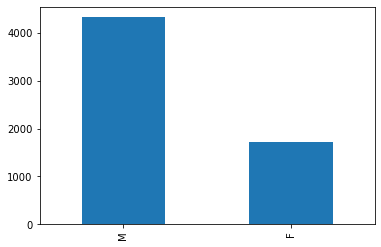

In [17]:
Master_Data_Users["Gender"].value_counts().plot(kind="bar")

In [18]:
female_perc = 1709/len(Master_Data_Users)
female_perc

0.2829001820890581

From the above graph, we can see that female users represents only 28% of the users.

______________

Let's Check the age distribution of the users

In [19]:
Master_Data_Users["Age"].value_counts()

25.0    2096
35.0    1193
18.0    1103
45.0     550
50.0     496
56.0     380
1.0      222
Name: Age, dtype: int64

In [20]:
Master_Data_Users["Age"].value_counts().to_frame().reset_index().rename(columns={"index":"Range"})

,Range,Age
0,25.0,2096
1,35.0,1193
2,18.0,1103
3,45.0,550
4,50.0,496
5,56.0,380
6,1.0,222


<AxesSubplot:title={'center':'Age Distribution'}>

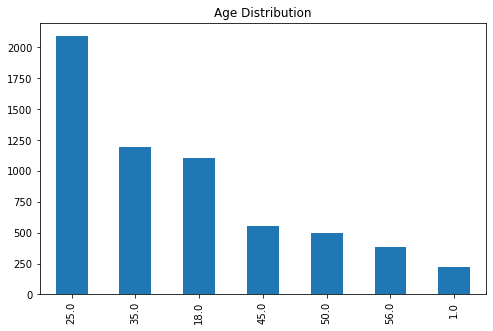

In [21]:
Master_Data_Users["Age"].value_counts().plot(kind="bar", figsize=(8,5),title = "Age Distribution")

We can see from the above graph that the majority of the users' age is between 18 and 44 and more than 2000 users of this group is between 25-35. There few users who are under 18 years old. There is also a good number of users who are older than 45 

_________________

__Let's check the top 25 movies based on the viewers ratings__

In [22]:
Master_Data.groupby(["MovieID","Title"])["Rating"].mean().to_frame().nlargest(25,"Rating")

,,Rating
MovieID,Title,
787,"Gate of Heavenly Peace, The (1995)",5.000000
989,Schlafes Bruder (Brother of Sleep) (1995),5.000000
1830,Follow the Bitch (1998),5.000000
3172,Ulysses (Ulisse) (1954),5.000000
3233,Smashing Time (1967),5.000000
3280,"Baby, The (1973)",5.000000
3382,Song of Freedom (1936),5.000000
3607,One Little Indian (1973),5.000000
3656,Lured (1947),5.000000


<AxesSubplot:title={'center':'Movies with Highest number of raters'}, xlabel='Title'>

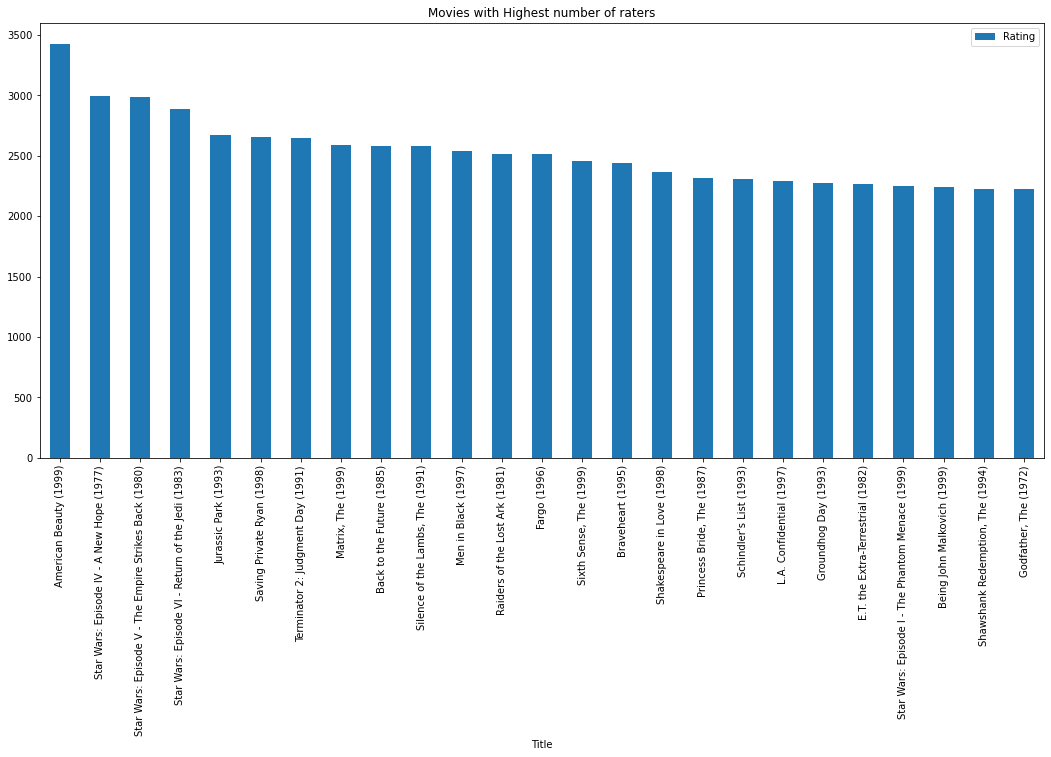

In [23]:
Master_Data.groupby(["MovieID","Title"])["Rating"].count().to_frame().nlargest(25,"Rating").reset_index()[["Title","Rating"]].plot(x="Title",
                                                                                                                                  title="Movies with Highest number of raters", kind="bar",figsize=(18,8))

Although we have extracted the top 25 movies by viewers ratings, we cannot conclude this information because some of the movies have rated by one user only. Let's fins out how many users have rated each of the above movies.

In [24]:
top_movies = Master_Data.groupby(["MovieID","Title"])["Rating"].mean().to_frame().nlargest(25,"Rating")

In [25]:
top_movies.reset_index(inplace=True)

In [26]:
top_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   MovieID  25 non-null     int64  
 1   Title    25 non-null     object 
 2   Rating   25 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 728.0+ bytes


In [27]:
movie_titles = list(top_movies["Title"])

In [28]:
movie_titles

['Gate of Heavenly Peace, The (1995)',
 'Schlafes Bruder (Brother of Sleep) (1995)',
 'Follow the Bitch (1998)',
 'Ulysses (Ulisse) (1954)',
 'Smashing Time (1967)',
 'Baby, The (1973)',
 'Song of Freedom (1936)',
 'One Little Indian (1973)',
 'Lured (1947)',
 'Bittersweet Motel (2000)',
 'I Am Cuba (Soy Cuba/Ya Kuba) (1964)',
 'Lamerica (1994)',
 'Apple, The (Sib) (1998)',
 'Sanjuro (1962)',
 'Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954)',
 'Shawshank Redemption, The (1994)',
 'Godfather, The (1972)',
 'Close Shave, A (1995)',
 'Usual Suspects, The (1995)',
 "Schindler's List (1993)",
 'Wrong Trousers, The (1993)',
 'Dangerous Game (1993)',
 'Mamma Roma (1962)',
 'Hour of the Pig, The (1993)',
 'Callej�n de los milagros, El (1995)']

In [29]:
Master_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000386 entries, 0 to 1000385
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   MovieID     1000386 non-null  int64  
 1   Title       1000386 non-null  object 
 2   UserID      1000209 non-null  float64
 3   Age         1000209 non-null  float64
 4   Gender      1000209 non-null  object 
 5   Occupation  1000209 non-null  float64
 6   Rating      1000209 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 61.1+ MB


In [30]:
movies_no_rating = Master_Data.set_index("Title")

In [31]:
movies_no_rating.loc[movie_titles]

,MovieID,UserID,Age,Gender,Occupation,Rating
Title,,,,,,
"Gate of Heavenly Peace, The (1995)",787,149.0,25.0,M,1.0,5.0
"Gate of Heavenly Peace, The (1995)",787,2825.0,25.0,F,20.0,5.0
"Gate of Heavenly Peace, The (1995)",787,2872.0,25.0,M,20.0,5.0
Schlafes Bruder (Brother of Sleep) (1995),989,1915.0,50.0,M,13.0,5.0
Follow the Bitch (1998),1830,2869.0,50.0,M,17.0,5.0
...,...,...,...,...,...,...
Mamma Roma (1962),557,4538.0,25.0,M,12.0,4.0
"Hour of the Pig, The (1993)",578,454.0,25.0,M,20.0,5.0
"Hour of the Pig, The (1993)",578,5636.0,25.0,M,7.0,4.0


In [32]:
movies_no_rating.loc[movie_titles].MovieID.value_counts()

527     2304
318     2227
858     2223
50      1783
1148     882
745      657
2019     628
2905      69
2503       9
53         8
3245       5
787        3
578        2
1795       2
3233       2
557        2
439        2
3607       1
3881       1
1830       1
989        1
3280       1
3172       1
3656       1
3382       1
Name: MovieID, dtype: int64

We can see that from the above results that most of the movies have been rated by less than 10 Users. 

__Let's see the top 25 movies with highest number of ratings.__

In [33]:
Master_Data.groupby(["MovieID","Title"])["Rating"].count().to_frame().nlargest(25,"Rating")

,,Rating
MovieID,Title,
2858,American Beauty (1999),3428
260,Star Wars: Episode IV - A New Hope (1977),2991
1196,Star Wars: Episode V - The Empire Strikes Back (1980),2990
1210,Star Wars: Episode VI - Return of the Jedi (1983),2883
480,Jurassic Park (1993),2672
2028,Saving Private Ryan (1998),2653
589,Terminator 2: Judgment Day (1991),2649
2571,"Matrix, The (1999)",2590
1270,Back to the Future (1985),2583


Let's check the average ratings for the top 25 movies of viewers ratings

In [34]:
top_25 = Master_Data.groupby(["MovieID","Title"])["Rating"].count().to_frame().nlargest(25,"Rating").reset_index()

In [35]:
top_25_titles = list(top_25["Title"])

In [36]:
movies_no_rating.loc[top_25_titles]

,MovieID,UserID,Age,Gender,Occupation,Rating
Title,,,,,,
American Beauty (1999),2858,2.0,56.0,M,16.0,4.0
American Beauty (1999),2858,3.0,25.0,M,15.0,4.0
American Beauty (1999),2858,5.0,25.0,M,20.0,4.0
American Beauty (1999),2858,6.0,50.0,F,9.0,1.0
American Beauty (1999),2858,8.0,25.0,M,12.0,5.0
...,...,...,...,...,...,...
"Godfather, The (1972)",858,6028.0,18.0,M,4.0,4.0
"Godfather, The (1972)",858,6033.0,50.0,M,13.0,4.0
"Godfather, The (1972)",858,6037.0,45.0,F,1.0,5.0


In [37]:
movies_no_rating.loc[top_25_titles].reset_index().groupby("Title")["Rating"].mean().sort_values(ascending=False)

Title
Shawshank Redemption, The (1994)                         4.554558
Godfather, The (1972)                                    4.524966
Schindler's List (1993)                                  4.510417
Raiders of the Lost Ark (1981)                           4.477725
Star Wars: Episode IV - A New Hope (1977)                4.453694
Sixth Sense, The (1999)                                  4.406263
Silence of the Lambs, The (1991)                         4.351823
Saving Private Ryan (1998)                               4.337354
American Beauty (1999)                                   4.317386
Matrix, The (1999)                                       4.315830
Princess Bride, The (1987)                               4.303710
Star Wars: Episode V - The Empire Strikes Back (1980)    4.292977
Fargo (1996)                                             4.254676
Braveheart (1995)                                        4.234957
L.A. Confidential (1997)                                 4.219406
Shak

<AxesSubplot:title={'center':'Highest Rated Movies'}, xlabel='Title'>

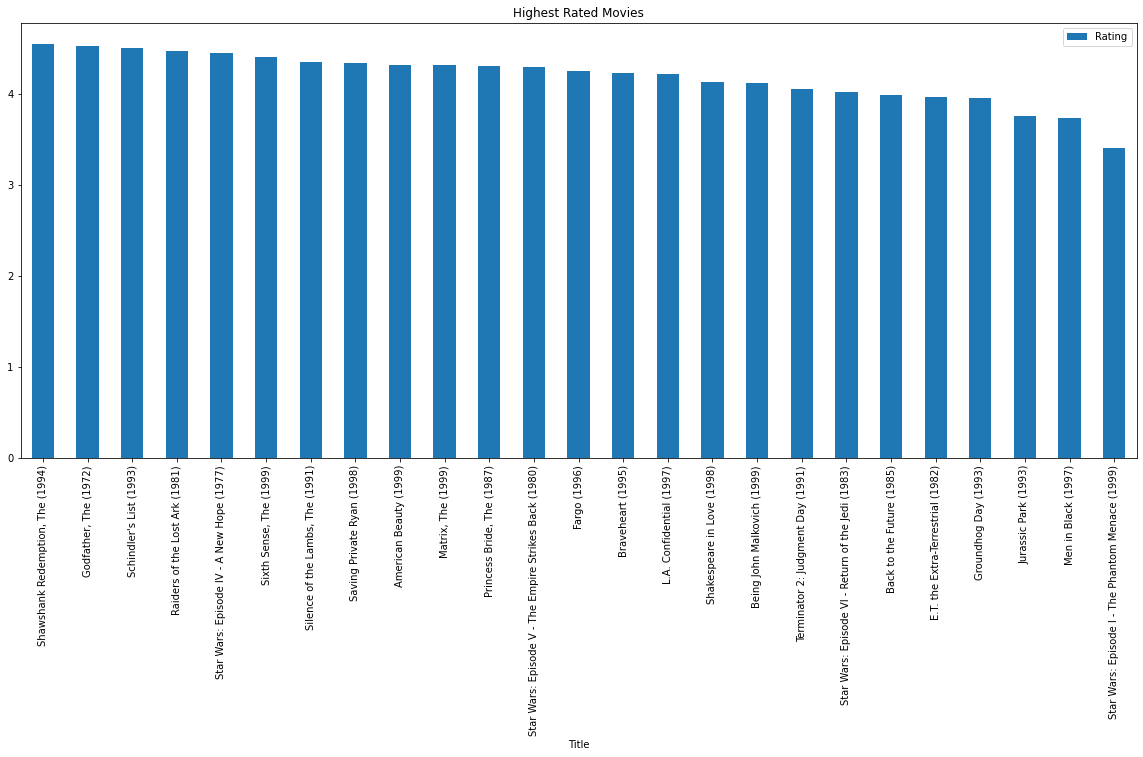

In [38]:
movies_no_rating.loc[top_25_titles].reset_index().groupby("Title")["Rating"].mean().sort_values(ascending=False).to_frame().reset_index().plot(
kind="bar",x="Title",title="Highest Rated Movies", figsize=(20,8))

We can see that all the movies with highest number of raters have been created before year 2000

_________________

__Let's check the rating of the movie "Toy Story"__

In [39]:
toy_story = Master_Data[Master_Data["Title"].str.lower().str.contains("toy story")]

In [40]:
toy_story.head()

,MovieID,Title,UserID,Age,Gender,Occupation,Rating
0,1,Toy Story (1995),1.0,1.0,F,10.0,5.0
1,1,Toy Story (1995),6.0,50.0,F,9.0,4.0
2,1,Toy Story (1995),8.0,25.0,M,12.0,4.0
3,1,Toy Story (1995),9.0,25.0,M,17.0,5.0
4,1,Toy Story (1995),10.0,35.0,F,1.0,5.0


In [41]:
toy_story.reset_index(inplace=True)

In [42]:
toy_story.Title.value_counts()

Toy Story (1995)      2077
Toy Story 2 (1999)    1585
Name: Title, dtype: int64

We can see that the toy story 1 has been rated by 2077 users while toy story 2 has been rated by 1585 users. Let's see the average rating for each movie.

In [43]:
toy_story.groupby("Title")["Rating"].mean()

Title
Toy Story (1995)      4.146846
Toy Story 2 (1999)    4.218927
Name: Rating, dtype: float64

Toy Story 1 has an average rating of of 4.15 while Toy Story 2 2 has an average rating of 4.22.

 _________________________

__Let's find the ratings for all the movies reviewed by for a particular user of user id = 2696__

In [44]:
Master_Data[Master_Data["UserID"]==2696].sort_values("Rating",ascending=False)

,MovieID,Title,UserID,Age,Gender,Occupation,Rating
200572,800,Lone Star (1996),2696.0,25.0,M,7.0,5.0
465160,1645,"Devil's Advocate, The (1997)",2696.0,25.0,M,7.0,4.0
493339,1783,Palmetto (1998),2696.0,25.0,M,7.0,4.0
270398,1092,Basic Instinct (1992),2696.0,25.0,M,7.0,4.0
851461,3176,"Talented Mr. Ripley, The (1999)",2696.0,25.0,M,7.0,4.0
349405,1258,"Shining, The (1980)",2696.0,25.0,M,7.0,4.0
646072,2389,Psycho (1998),2696.0,25.0,M,7.0,4.0
507112,1892,"Perfect Murder, A (1998)",2696.0,25.0,M,7.0,4.0
457283,1617,L.A. Confidential (1997),2696.0,25.0,M,7.0,4.0
459925,1625,"Game, The (1997)",2696.0,25.0,M,7.0,4.0


___________________

## Feature Engineering

- Find out all the unique genres (Hint: split the data in column genre making a list and then process the data to find out only the unique categories of genres)

- Create a separate column for each genre category with a one-hot encoding ( 1 and 0) whether or not the movie belongs to that genre. 

In [45]:
Master_Data

,MovieID,Title,UserID,Age,Gender,Occupation,Rating
0,1,Toy Story (1995),1.0,1.0,F,10.0,5.0
1,1,Toy Story (1995),6.0,50.0,F,9.0,4.0
2,1,Toy Story (1995),8.0,25.0,M,12.0,4.0
3,1,Toy Story (1995),9.0,25.0,M,17.0,5.0
4,1,Toy Story (1995),10.0,35.0,F,1.0,5.0
...,...,...,...,...,...,...,...
1000381,3952,"Contender, The (2000)",5812.0,25.0,F,7.0,4.0
1000382,3952,"Contender, The (2000)",5831.0,25.0,M,1.0,3.0
1000383,3952,"Contender, The (2000)",5837.0,25.0,M,7.0,4.0
1000384,3952,"Contender, The (2000)",5927.0,35.0,M,14.0,1.0


We will start extracting the movie IDs and the Genre columns from the movies df.

In [46]:
genre = movies[["MovieID","Genres"]]

In [47]:
genre.set_index("MovieID",inplace=True)

In [48]:
genre_split = genre["Genres"].str.split("|",expand=True)
genre_list=[]

In [49]:
genre_split.values

array([['Animation', "Children's", 'Comedy', None, None, None],
       ['Adventure', "Children's", 'Fantasy', None, None, None],
       ['Comedy', 'Romance', None, None, None, None],
       ...,
       ['Drama', None, None, None, None, None],
       ['Drama', None, None, None, None, None],
       ['Drama', 'Thriller', None, None, None, None]], dtype=object)

____

in the folloiwng cells, we will create a list with the unique genres

In [50]:
for row in genre_split.values:
    for genres in row:
        genre_list.append(genres)

In [51]:
len(genre_list)

23298

In [52]:
list(set(genre_list))

['Adventure',
 'Animation',
 'Drama',
 'Documentary',
 'Mystery',
 'Fantasy',
 'Horror',
 'Comedy',
 'War',
 'Musical',
 'Romance',
 'Western',
 None,
 'Crime',
 'Thriller',
 'Film-Noir',
 'Action',
 'Sci-Fi',
 "Children's"]

In [53]:
genre_list = list(set(genre_list))

In [54]:
genre_list.remove(None)

In [55]:
genre_list

['Adventure',
 'Animation',
 'Drama',
 'Documentary',
 'Mystery',
 'Fantasy',
 'Horror',
 'Comedy',
 'War',
 'Musical',
 'Romance',
 'Western',
 'Crime',
 'Thriller',
 'Film-Noir',
 'Action',
 'Sci-Fi',
 "Children's"]

In [56]:
len(genre_list)

18

In the folloiwng cells, we will generate a new column for each movie genre

In [57]:
for i in list(set(genre_list)):
    genre.insert(len(genre.columns),i,0)

In [58]:
genre

,Genres,Adventure,Fantasy,Horror,Comedy,War,Crime,Sci-Fi,Animation,Thriller,Drama,Mystery,Documentary,Musical,Children's,Romance,Film-Noir,Western,Action
MovieID,,,,,,,,,,,,,,,,,,,
1,Animation|Children's|Comedy,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Adventure|Children's|Fantasy,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Comedy|Romance,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Comedy|Drama,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Comedy,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3948,Comedy,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3949,Drama,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3950,Drama,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [59]:
genre.reset_index(inplace=True)

In [60]:
genre

,MovieID,Genres,Adventure,Fantasy,Horror,Comedy,War,Crime,Sci-Fi,Animation,Thriller,Drama,Mystery,Documentary,Musical,Children's,Romance,Film-Noir,Western,Action
0,1,Animation|Children's|Comedy,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,Adventure|Children's|Fantasy,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,Comedy|Romance,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,Comedy|Drama,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,Comedy,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,3948,Comedy,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3879,3949,Drama,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3880,3950,Drama,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3881,3951,Drama,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


in the folloiwng cell, we will take each row and then check the Genres columns and mark the corresponding genre columns with 1.

In [61]:
for i in genre.index:
    movie_genre = genre.iloc[i,1]
    
    for g in list(movie_genre.split("|")):
        genre[g][i]=1

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3437: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


let's verify the results.

In [62]:
genre.iloc[20:30]

,MovieID,Genres,Adventure,Fantasy,Horror,Comedy,War,Crime,Sci-Fi,Animation,Thriller,Drama,Mystery,Documentary,Musical,Children's,Romance,Film-Noir,Western,Action
20,21,Action|Comedy|Drama,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
21,22,Crime|Drama|Thriller,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0
22,23,Thriller,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
23,24,Drama|Sci-Fi,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
24,25,Drama|Romance,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
25,26,Drama,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
26,27,Drama,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
27,28,Romance,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
28,29,Adventure|Sci-Fi,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
29,30,Drama,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [63]:
genre.drop("Genres",axis=1,inplace=True)

D:\Anaconda\lib\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [64]:
genre

,MovieID,Adventure,Fantasy,Horror,Comedy,War,Crime,Sci-Fi,Animation,Thriller,Drama,Mystery,Documentary,Musical,Children's,Romance,Film-Noir,Western,Action
0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1,2,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,4,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,3948,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3879,3949,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3880,3950,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3881,3951,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [65]:
Master_Data

,MovieID,Title,UserID,Age,Gender,Occupation,Rating
0,1,Toy Story (1995),1.0,1.0,F,10.0,5.0
1,1,Toy Story (1995),6.0,50.0,F,9.0,4.0
2,1,Toy Story (1995),8.0,25.0,M,12.0,4.0
3,1,Toy Story (1995),9.0,25.0,M,17.0,5.0
4,1,Toy Story (1995),10.0,35.0,F,1.0,5.0
...,...,...,...,...,...,...,...
1000381,3952,"Contender, The (2000)",5812.0,25.0,F,7.0,4.0
1000382,3952,"Contender, The (2000)",5831.0,25.0,M,1.0,3.0
1000383,3952,"Contender, The (2000)",5837.0,25.0,M,7.0,4.0
1000384,3952,"Contender, The (2000)",5927.0,35.0,M,14.0,1.0


Let's merge the genre df with the Master_Data df on the MovieID column.

In [66]:
Master_Data = Master_Data.merge(genre, how="left",right_on="MovieID",left_on="MovieID")

In [67]:
Master_Data

,MovieID,Title,UserID,Age,Gender,Occupation,Rating,Adventure,Fantasy,Horror,...,Thriller,Drama,Mystery,Documentary,Musical,Children's,Romance,Film-Noir,Western,Action
0,1,Toy Story (1995),1.0,1.0,F,10.0,5.0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,Toy Story (1995),6.0,50.0,F,9.0,4.0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1,Toy Story (1995),8.0,25.0,M,12.0,4.0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1,Toy Story (1995),9.0,25.0,M,17.0,5.0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,Toy Story (1995),10.0,35.0,F,1.0,5.0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000381,3952,"Contender, The (2000)",5812.0,25.0,F,7.0,4.0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
1000382,3952,"Contender, The (2000)",5831.0,25.0,M,1.0,3.0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
1000383,3952,"Contender, The (2000)",5837.0,25.0,M,7.0,4.0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
1000384,3952,"Contender, The (2000)",5927.0,35.0,M,14.0,1.0,0,0,0,...,1,1,0,0,0,0,0,0,0,0


We will drop the rows with missing values

In [68]:
Master_Data.dropna(axis=0,inplace=True)

In [69]:
Master_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000385
Data columns (total 25 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   MovieID      1000209 non-null  int64  
 1   Title        1000209 non-null  object 
 2   UserID       1000209 non-null  float64
 3   Age          1000209 non-null  float64
 4   Gender       1000209 non-null  object 
 5   Occupation   1000209 non-null  float64
 6   Rating       1000209 non-null  float64
 7   Adventure    1000209 non-null  int64  
 8   Fantasy      1000209 non-null  int64  
 9   Horror       1000209 non-null  int64  
 10  Comedy       1000209 non-null  int64  
 11  War          1000209 non-null  int64  
 12  Crime        1000209 non-null  int64  
 13  Sci-Fi       1000209 non-null  int64  
 14  Animation    1000209 non-null  int64  
 15  Thriller     1000209 non-null  int64  
 16  Drama        1000209 non-null  int64  
 17  Mystery      1000209 non-null  int64  
 18  Do

___________________________

As we do not have enough information to inestigate and determine the featires that are are effeting the rating, we only check the Genres and the Gender

In [73]:
Genre_Rating = Master_Data[['Gender','Rating','Western', 'Documentary', 'Thriller', 'Action', 'Musical', 'Comedy', 'Mystery', 'Children\'s', 'Romance', 'Fantasy', 'Animation', 'War', 
                           'Adventure', 'Crime', 'Sci-Fi', 'Film-Noir', 'Drama', 'Horror']]

In [74]:
genre_columns = ['Western', 'Documentary', 'Thriller', 'Action', 'Musical', 'Comedy', 'Mystery', 'Children\'s', 'Romance', 'Fantasy', 'Animation', 'War', 
                           'Adventure', 'Crime', 'Sci-Fi', 'Film-Noir', 'Drama', 'Horror']

In [75]:
for col in genre_columns:
    print("The Average rating for the {} movies is :{}".format(col,Genre_Rating[Genre_Rating[col]==1]["Rating"].mean()))

The Average rating for the Western movies is :3.6377701493980563
The Average rating for the Documentary movies is :3.933122629582807
The Average rating for the Thriller movies is :3.5704660480809784
The Average rating for the Action movies is :3.4911849357368414
The Average rating for the Musical movies is :3.6655189849035708
The Average rating for the Comedy movies is :3.522098827752538
The Average rating for the Mystery movies is :3.6681019463387923
The Average rating for the Children's movies is :3.422034743579087
The Average rating for the Romance movies is :3.607464598740535
The Average rating for the Fantasy movies is :3.447370595851354
The Average rating for the Animation movies is :3.684868223500335
The Average rating for the War movies is :3.893326717935996
The Average rating for the Adventure movies is :3.477256948332624
The Average rating for the Crime movies is :3.708678543141273
The Average rating for the Sci-Fi movies is :3.466521291339784
The Average rating for the Film-

Let's check the averagre rating for each Genre by Gender

In [85]:
for col in genre_columns:
    print("The Average rating for the {} movies by Males is :{}".format(col,Genre_Rating[(Genre_Rating[col]==1) & (Genre_Rating["Gender"]=='M')]["Rating"].mean()))

The Average rating for the Western movies by Males is :3.6551203068696965
The Average rating for the Documentary movies by Males is :3.9288107202680065
The Average rating for the Thriller movies by Males is :3.5696850815413868
The Average rating for the Action movies by Males is :3.4913860259575933
The Average rating for the Musical movies by Males is :3.596332239189382
The Average rating for the Comedy movies by Males is :3.503666796000138
The Average rating for the Mystery movies by Males is :3.662009138467651
The Average rating for the Children's movies by Males is :3.3589612534156363
The Average rating for the Romance movies by Males is :3.5732622960936373
The Average rating for the Fantasy movies by Males is :3.4266033426385816
The Average rating for the Animation movies by Males is :3.661334963954686
The Average rating for the War movies by Males is :3.8933754638644964
The Average rating for the Adventure movies by Males is :3.468125416193808
The Average rating for the Crime movi

In [81]:
for col in genre_columns:
    print("The Average rating for the {} movies by Females is :{}".format(col,Genre_Rating[(Genre_Rating[col]==1) & (Genre_Rating["Gender"]=='F')]["Rating"].mean()))

The Average rating for the Western movies by Females is :3.551912568306011
The Average rating for the Documentary movies by Females is :3.94639175257732
The Average rating for the Thriller movies by Females is :3.5733601270219313
The Average rating for the Action movies by Females is :3.490251916757941
The Average rating for the Musical movies by Females is :3.8091077378748612
The Average rating for the Comedy movies by Females is :3.5719375512875113
The Average rating for the Mystery movies by Females is :3.6865477145148358
The Average rating for the Children's movies by Females is :3.572547731857203
The Average rating for the Romance movies by Females is :3.673578941089926
The Average rating for the Fantasy movies by Females is :3.5130763936682725
The Average rating for the Animation movies by Females is :3.744701742901563
The Average rating for the War movies by Females is :3.893138437522174
The Average rating for the Adventure movies by Females is :3.5128786770086347
The Average ra

_______________

Lets get back to the Master_Data data frame and start building a model to estimate the rating based on the given information.First, we will derive a new feature (Year) based on the year mentioned in the movie title.

In [125]:
def year(title):
    return title.split("(")[-1].split(")")[0]

In [126]:
Master_Data["Year"] = Master_Data["Title"].apply(year)

In [127]:
Master_Data["Year"].unique()

array(['1995', '1994', '1996', '1976', '1993', '1992', '1988', '1967',
       '1964', '1977', '1965', '1982', '1962', '1990', '1991', '1989',
       '1937', '1940', '1969', '1981', '1973', '1970', '1960', '1955',
       '1956', '1959', '1968', '1980', '1975', '1948', '1943', '1963',
       '1950', '1987', '1997', '1974', '1958', '1972', '1998', '1952',
       '1951', '1957', '1961', '1954', '1934', '1944', '1942', '1941',
       '1953', '1939', '1947', '1946', '1945', '1938', '1935', '1936',
       '1926', '1949', '1932', '1930', '1971', '1979', '1986', '1966',
       '1978', '1985', '1983', '1984', '1933', '1931', '1922', '1927',
       '1929', '1928', '1999', '1925', '1919', '1923', '2000', '1920',
       '1921'], dtype=object)

In [138]:
Master_Data["Year"] = Master_Data["Year"].astype("int64")

Next Step, we will modify the Gender as the folloiwng:

- M:1
- F:0

In [141]:
Master_Data["Gender"] = Master_Data["Gender"].map({"M":1,"F":0})

In [143]:
Master_Data.head()

,MovieID,Title,UserID,Age,Gender,Occupation,Rating,Adventure,Fantasy,Horror,...,Drama,Mystery,Documentary,Musical,Children's,Romance,Film-Noir,Western,Action,Year
0,1,Toy Story (1995),1.0,1.0,0,10.0,5.0,0,0,0,...,0,0,0,0,1,0,0,0,0,1995
1,1,Toy Story (1995),6.0,50.0,0,9.0,4.0,0,0,0,...,0,0,0,0,1,0,0,0,0,1995
2,1,Toy Story (1995),8.0,25.0,1,12.0,4.0,0,0,0,...,0,0,0,0,1,0,0,0,0,1995
3,1,Toy Story (1995),9.0,25.0,1,17.0,5.0,0,0,0,...,0,0,0,0,1,0,0,0,0,1995
4,1,Toy Story (1995),10.0,35.0,0,1.0,5.0,0,0,0,...,0,0,0,0,1,0,0,0,0,1995


Next, we will take a subset of the columns which could be useful for our model.

In [144]:
Master_Data.columns

Index(['MovieID', 'Title', 'UserID', 'Age', 'Gender', 'Occupation', 'Rating',
       'Adventure', 'Fantasy', 'Horror', 'Comedy', 'War', 'Crime', 'Sci-Fi',
       'Animation', 'Thriller', 'Drama', 'Mystery', 'Documentary', 'Musical',
       'Children's', 'Romance', 'Film-Noir', 'Western', 'Action', 'Year'],
      dtype='object')

In [145]:
X= Master_Data[['Age', 'Gender', 'Occupation', 'Rating',
       'Adventure', 'Fantasy', 'Horror', 'Comedy', 'War', 'Crime', 'Sci-Fi',
       'Animation', 'Thriller', 'Drama', 'Mystery', 'Documentary', 'Musical',
       'Children\'s', 'Romance', 'Film-Noir', 'Western', 'Action', 'Year']]

In [146]:
y=Master_Data["Rating"]

In [147]:
X.head()

,Age,Gender,Occupation,Rating,Adventure,Fantasy,Horror,Comedy,War,Crime,...,Drama,Mystery,Documentary,Musical,Children's,Romance,Film-Noir,Western,Action,Year
0,1.0,0,10.0,5.0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1995
1,50.0,0,9.0,4.0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1995
2,25.0,1,12.0,4.0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1995
3,25.0,1,17.0,5.0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1995
4,35.0,0,1.0,5.0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1995


In [148]:
y.head()

0    5.0
1    4.0
2    4.0
3    5.0
4    5.0
Name: Rating, dtype: float64

Next, we will standerize the values in our X dataset using Standard Scalar class from SKLearn

In [149]:
from sklearn.preprocessing import StandardScaler

In [150]:
ss = StandardScaler()

In [151]:
X = ss.fit_transform(X)

Next, we will split our dataset into training and testing data

In [153]:
from sklearn.model_selection import train_test_split

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Let's import the Linear Regression class

In [155]:
from sklearn.linear_model import LinearRegression

In [156]:
lr = LinearRegression()

In [157]:
lr.fit(X_train,y_train)

LinearRegression()

In [158]:
prediction = lr.predict(X_test)

In [159]:
prediction

array([2., 3., 3., ..., 4., 4., 4.])

In [162]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [163]:
print(mean_squared_error(y_test,prediction))

1.0246394080629774e-27


In [164]:
print(mean_absolute_error(y_test,prediction))

2.5761959241318786e-14
